In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys, json
from copy import deepcopy

import pickle

sns.set_palette("muted")
sns.set_context("talk")
sns.set_style("white")
pd.set_option("display.max_columns", None)

plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [194]:
# angles
polars = np.linspace(0, 180, 19)
azimuths = np.linspace(0, 360, 37)

# points
from itertools import product

df = pd.DataFrame(product(polars, azimuths), columns=["azi", "polar"])
df["x"] = df.apply(lambda x: np.cos(np.deg2rad(x[1]))*np.sin(np.deg2rad(x[0])), axis=1)
df["y"] = df.apply(lambda x: np.sin(np.deg2rad(x[1]))*np.sin(np.deg2rad(x[0])), axis=1)
df["z"] = df.apply(lambda x: np.cos(np.deg2rad(x[0])), axis=1)

df

,azi,polar,x,y,z
0,0.0,0.0,0.000000e+00,0.000000e+00,1.0
1,0.0,10.0,0.000000e+00,0.000000e+00,1.0
2,0.0,20.0,0.000000e+00,0.000000e+00,1.0
3,0.0,30.0,0.000000e+00,0.000000e+00,1.0
4,0.0,40.0,0.000000e+00,0.000000e+00,1.0
...,...,...,...,...,...
698,180.0,320.0,9.381339e-17,-7.871878e-17,-1.0
699,180.0,330.0,1.060575e-16,-6.123234e-17,-1.0
700,180.0,340.0,1.150792e-16,-4.188539e-17,-1.0
701,180.0,350.0,1.206042e-16,-2.126577e-17,-1.0


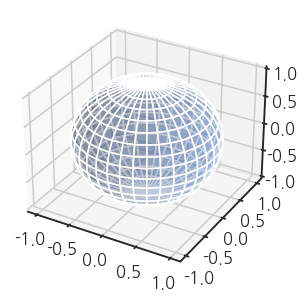

In [4]:
fig, ax = plt.subplots(figsize=(5, 5), 
                       subplot_kw={"projection":"3d"})
ax.plot_surface(df["x"].values.reshape((19, 37)), 
                df["y"].values.reshape((19, 37)), 
                df["z"].values.reshape((19, 37)), 
                alpha=0.3)
fig.savefig("84_sphere_06.png")

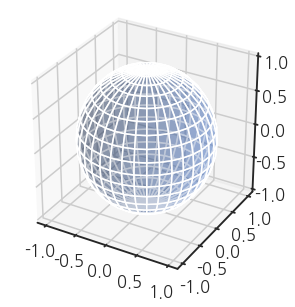

In [5]:
fig, ax = plt.subplots(figsize=(5, 5), 
                       subplot_kw={"projection":"3d"})
ax.plot_surface(df["x"].values.reshape((19, 37)), 
                df["y"].values.reshape((19, 37)), 
                df["z"].values.reshape((19, 37)), 
                alpha=0.3)
ax.set_box_aspect((1, 1, 1))
fig.savefig("84_sphere_07.png")

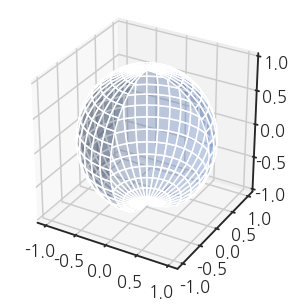

In [6]:
fig, ax = plt.subplots(figsize=(5, 5), 
                       subplot_kw={"projection":"3d"})
ax.plot_surface(df["x"].values.reshape((19, 37))[:,:-9], 
                df["y"].values.reshape((19, 37))[:,:-9], 
                df["z"].values.reshape((19, 37))[:,:-9], 
                alpha=0.3)
ax.set_box_aspect((1, 1, 1))
fig.savefig("84_sphere_08.png")

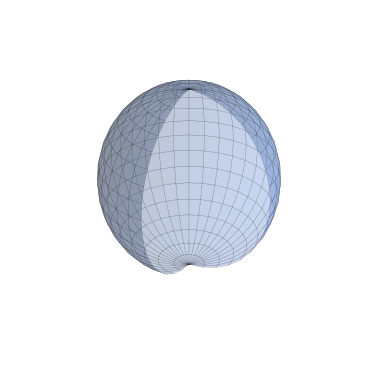

In [7]:
fig, ax = plt.subplots(figsize=(5, 5), 
                       constrained_layout=True,
                       subplot_kw={"projection":"3d"})
ax.plot_surface(df["x"].values.reshape((19, 37))[:,:-9], 
                df["y"].values.reshape((19, 37))[:,:-9], 
                df["z"].values.reshape((19, 37))[:,:-9], 
                ec="k", lw=0.2, ls=":",
                alpha=0.3)
ax.set_box_aspect((1, 1, 1))
ax.axis(False)
fig.savefig("84_sphere_09.png")

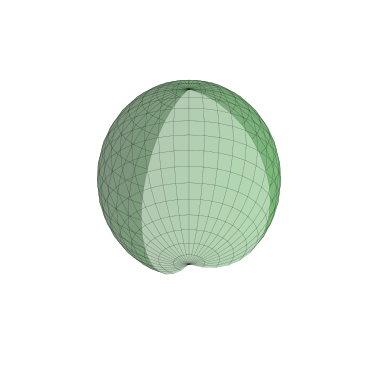

In [8]:
fig, ax = plt.subplots(figsize=(5, 5), 
                       constrained_layout=True,
                       subplot_kw={"projection":"3d"})
ax.plot_surface(df["x"].values.reshape((19, 37))[:,:-9], 
                df["y"].values.reshape((19, 37))[:,:-9], 
                df["z"].values.reshape((19, 37))[:,:-9], 
                ec="k", lw=0.2, ls=":",
                color="g",
                alpha=0.3)
ax.set_box_aspect((1, 1, 1))
ax.axis(False)
fig.savefig("84_sphere_10.png")

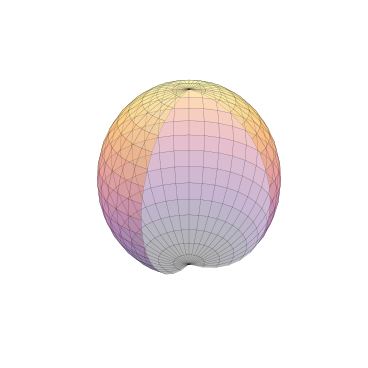

In [10]:
fig, ax = plt.subplots(figsize=(5, 5), 
                       constrained_layout=True,
                       subplot_kw={"projection":"3d"})
ax.plot_surface(df["x"].values.reshape((19, 37))[:,:-9], 
                df["y"].values.reshape((19, 37))[:,:-9], 
                df["z"].values.reshape((19, 37))[:,:-9], 
                ec="k", lw=0.2, ls=":",
                cmap="inferno",
                alpha=0.3)
ax.set_box_aspect((1, 1, 1))
ax.axis(False)
fig.savefig("84_sphere_11.png")

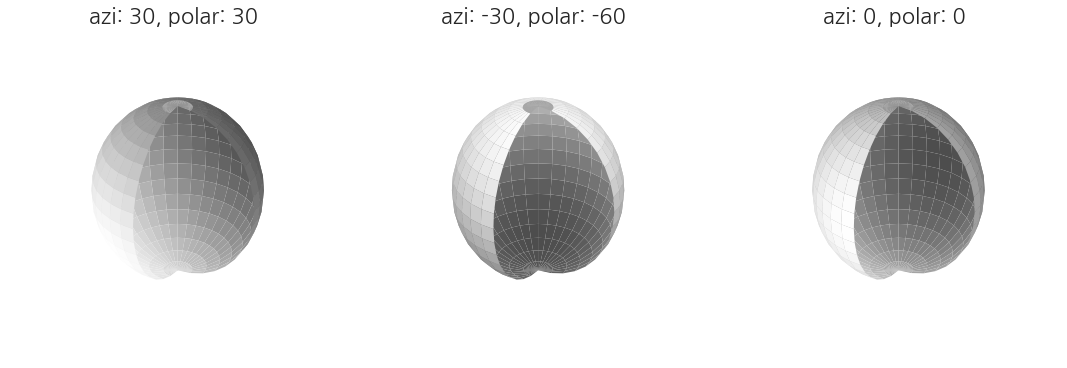

In [34]:
from matplotlib.colors import LightSource

fig, axs = plt.subplots(ncols=3,
                        figsize=(15, 5), 
                        constrained_layout=True,
                        subplot_kw={"projection":"3d"})

lightsources = [LightSource(30, 30), LightSource(-30, -60), LightSource(0, 0)]
titles = ["azi: 30, polar: 30", "azi: -30, polar: -60", "azi: 0, polar: 0"]
for ax, ls, title in zip(axs, lightsources, titles):
    ax.plot_surface(df["x"].values.reshape((19, 37))[:,:-9], 
                    df["y"].values.reshape((19, 37))[:,:-9], 
                    df["z"].values.reshape((19, 37))[:,:-9], 
                    ec="none", lw=0, ls="-",
                    color="w", lightsource=ls,
                    alpha=1)
    ax.set_title(title, fontsize="large")
    ax.set_box_aspect((1, 1, 1))
    ax.axis(False)

fig.savefig("84_sphere_12.png")

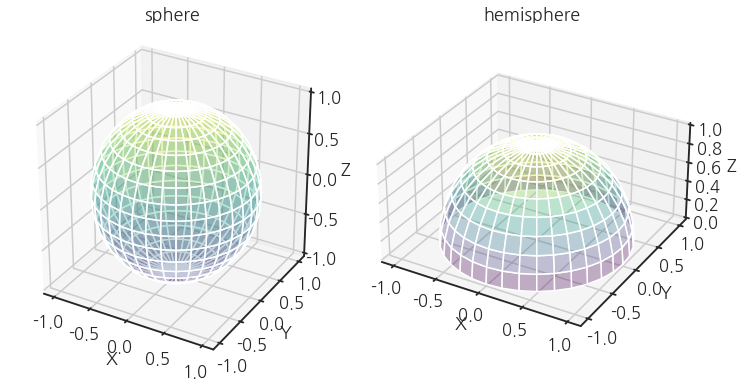

In [195]:
fig, axs = plt.subplots(ncols=2, 
                        figsize=(10, 5), 
                        constrained_layout=True, 
                        subplot_kw={"projection":"3d"})

# sphere
axs[0].plot_surface(df["x"].values.reshape((19, 37)), 
                    df["y"].values.reshape((19, 37)), 
                    df["z"].values.reshape((19, 37)), 
                    cmap="viridis", 
                    alpha=0.3)
axs[0].set_box_aspect((1, 1, 1))
axs[0].set_title("sphere", pad=12)

# hemisphere
axs[1].plot_surface(df["x"].iloc[:370].values.reshape((10, 37)), 
                    df["y"].iloc[:370].values.reshape((10, 37)), 
                    df["z"].iloc[:370].values.reshape((10, 37)), 
                    cmap="viridis", 
                    alpha=0.3)

axs[1].set_box_aspect((1, 1, 0.5))
axs[1].set_title("hemisphere", pad=12)

for ax in axs:
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

fig.savefig("84_sphere_01.png")

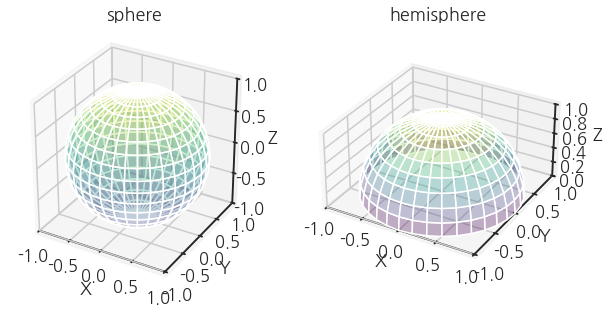

In [196]:
fig, axs = plt.subplots(ncols=2, 
                        figsize=(10, 5), 
                        subplot_kw={"projection":"3d"})

# Axes3D 딱 붙이기
# https://stackoverflow.com/questions/16488182/removing-axes-margins-in-3d-plot
from mpl_toolkits.mplot3d.axis3d import Axis
if not hasattr(Axis, "_get_coord_info_old"):
    def _get_coord_info_new(self, renderer):
        mins, maxs, centers, deltas, tc, highs = self._get_coord_info_old(renderer)
        mins += deltas / 4
        maxs -= deltas / 4
        return mins, maxs, centers, deltas, tc, highs
    Axis._get_coord_info_old = Axis._get_coord_info  
    Axis._get_coord_info = _get_coord_info_new

# sphere
axs[0].plot_surface(df["x"].values.reshape((19, 37)), 
                    df["y"].values.reshape((19, 37)), 
                    df["z"].values.reshape((19, 37)), 
                    cmap="viridis", 
                    alpha=0.3)
axs[0].set_box_aspect((1, 1, 1))
axs[0].set_title("sphere", pad=12)

# hemisphere
axs[1].plot_surface(df["x"].iloc[:370].values.reshape((10, 37)), 
                    df["y"].iloc[:370].values.reshape((10, 37)), 
                    df["z"].iloc[:370].values.reshape((10, 37)), 
                    cmap="viridis", 
                    alpha=0.3)

axs[1].set_box_aspect((1, 1, 0.5))
axs[1].set_title("hemisphere", pad=12)

for ax in axs:
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.margins(0)

fig.savefig("84_sphere_02.png")

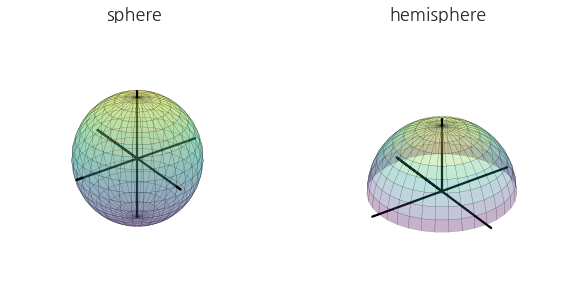

In [201]:
fig, axs = plt.subplots(ncols=2, 
                        figsize=(10, 5), 
                        subplot_kw={"projection":"3d"})

# Axes3D 딱 붙이기
# https://stackoverflow.com/questions/16488182/removing-axes-margins-in-3d-plot
from mpl_toolkits.mplot3d.axis3d import Axis
if not hasattr(Axis, "_get_coord_info_old"):
    def _get_coord_info_new(self, renderer):
        mins, maxs, centers, deltas, tc, highs = self._get_coord_info_old(renderer)
        mins += deltas / 4
        maxs -= deltas / 4
        return mins, maxs, centers, deltas, tc, highs
    Axis._get_coord_info_old = Axis._get_coord_info  
    Axis._get_coord_info = _get_coord_info_new

# sphere
axs[0].plot_surface(df["x"].values.reshape((19, 37)), 
                    df["y"].values.reshape((19, 37)), 
                    df["z"].values.reshape((19, 37)), 
                    cmap="viridis", ec="k", lw=0.1,
                    alpha=0.3)
axs[0].set_box_aspect((1, 1, 1))
axs[0].set_title("sphere", pad=12)

# hemisphere
axs[1].plot_surface(df["x"].iloc[:370].values.reshape((10, 37)), 
                    df["y"].iloc[:370].values.reshape((10, 37)), 
                    df["z"].iloc[:370].values.reshape((10, 37)), 
                    cmap="viridis", ec="k", lw=0.1,
                    alpha=0.3)

axs[1].set_box_aspect((1, 1, 0.5))
axs[1].set_title("hemisphere", pad=12)

for ax in axs:
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.axis(False)
    ax.view_init(azim=235)
    # remove margins
    ax.margins(0)

    # center axis
    zmin = -1 if ax == axs[0] else 0
    ax.plot([-1.1, 1.1], [0, 0], [0, 0], c="k", zorder=-10)
    ax.plot([0, 0, 0], [-1.1, 1.1, 0], c="k", zorder=-10)
    ax.plot([0, 0], [0, 0], [zmin, 1], c="k", zorder=-10)
    ax.plot([0, 0], [0, 0], [1, 1.1], c="k", zorder=3)
    
    if ax == axs[0]:
        ax.plot([-1, -1.1], [0, 0], [0, 0], c="k", zorder=3)
        ax.plot([0, 0], [-1, -1.1], [0, 0], c="k", zorder=3)


fig.savefig("84_sphere_03.png")

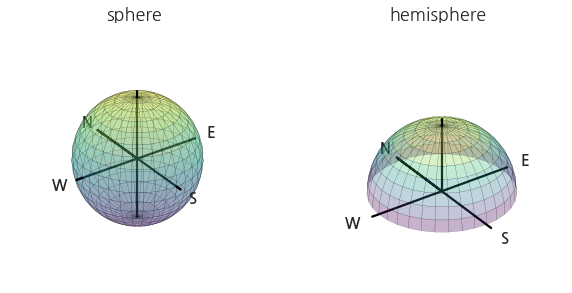

In [202]:
fig, axs = plt.subplots(ncols=2, 
                        figsize=(10, 5), 
                        subplot_kw={"projection":"3d"})

# Axes3D 딱 붙이기
# https://stackoverflow.com/questions/16488182/removing-axes-margins-in-3d-plot
from mpl_toolkits.mplot3d.axis3d import Axis
if not hasattr(Axis, "_get_coord_info_old"):
    def _get_coord_info_new(self, renderer):
        mins, maxs, centers, deltas, tc, highs = self._get_coord_info_old(renderer)
        mins += deltas / 4
        maxs -= deltas / 4
        return mins, maxs, centers, deltas, tc, highs
    Axis._get_coord_info_old = Axis._get_coord_info  
    Axis._get_coord_info = _get_coord_info_new

# sphere
axs[0].plot_surface(df["x"].values.reshape((19, 37)), 
                    df["y"].values.reshape((19, 37)), 
                    df["z"].values.reshape((19, 37)), 
                    cmap="viridis", ec="k", lw=0.1, 
                    alpha=0.3)
axs[0].set_box_aspect((1, 1, 1))
axs[0].set_title("sphere", pad=12)

# hemisphere
axs[1].plot_surface(df["x"].iloc[:370].values.reshape((10, 37)), 
                    df["y"].iloc[:370].values.reshape((10, 37)), 
                    df["z"].iloc[:370].values.reshape((10, 37)), 
                    cmap="viridis", ec="k", lw=0.1, 
                    alpha=0.3)

axs[1].set_box_aspect((1, 1, 0.5))
axs[1].set_title("hemisphere", pad=12)

for ax in axs:
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.view_init(azim=235)
    # make margins
    ax.margins(0)
    # center axis
    zmin = -1 if ax == axs[0] else 0
    ax.plot([-1.1, 1.1], [0, 0], [0, 0], c="k", zorder=-10)
    ax.plot([0, 0, 0], [-1.1, 1.1, 0], c="k", zorder=-10)
    ax.plot([0, 0], [0, 0], [zmin, 1], c="k", zorder=-10)
    ax.plot([0, 0], [0, 0], [1, 1.1], c="k", zorder=3)
    
    if ax == axs[0]:
        ax.plot([-1, -1.1], [0, 0], [0, 0], c="k", zorder=3)
        ax.plot([0, 0], [-1, -1.1], [0, 0], c="k", zorder=3)
     
    # 동서남북 표시
    font_text = {"fontweight":"bold", "fontsize":15, "ha":"center", "va":"center"}
    ax.text(-1.4, 0, 0, "W", transform=ax.transData, fontdict=font_text)
    ax.text(1.4, 0, 0, "E", transform=ax.transData, fontdict=font_text)
    ax.text(0, 1.4, 0, "N", transform=ax.transData, fontdict=font_text, zorder=-10)
    ax.text(0, -1.4, 0, "S", transform=ax.transData, fontdict=font_text)
    ax.axis(False)


fig.savefig("84_sphere_04.png")

In [142]:
# angles
polars = np.linspace(0, 179, 37)
azimuths = np.linspace(0, 360, 73)

# points
from itertools import product

df = pd.DataFrame(product(polars, azimuths), columns=["azi", "polar"])
df["x"] = df.apply(lambda x: np.cos(np.deg2rad(x[1]))*np.sin(np.deg2rad(x[0])), axis=1)
df["y"] = df.apply(lambda x: np.sin(np.deg2rad(x[1]))*np.sin(np.deg2rad(x[0])), axis=1)
df["z"] = df.apply(lambda x: np.cos(np.deg2rad(x[0])), axis=1)

df

,azi,polar,x,y,z
0,0.0,0.0,0.000000,0.000000e+00,1.000000
1,0.0,5.0,0.000000,0.000000e+00,1.000000
2,0.0,10.0,0.000000,0.000000e+00,1.000000
3,0.0,15.0,0.000000,0.000000e+00,1.000000
4,0.0,20.0,0.000000,0.000000e+00,1.000000
...,...,...,...,...,...
2696,179.0,340.0,0.016400,-5.969075e-03,-0.999848
2697,179.0,345.0,0.016858,-4.517015e-03,-0.999848
2698,179.0,350.0,0.017187,-3.030579e-03,-0.999848
2699,179.0,355.0,0.017386,-1.521077e-03,-0.999848


In [143]:
K1_Co = 45
K2_Co = 15

K1_Fe = 4.8
K2_Fe = 0.5

K1_Ni = -0.5 
K2_Ni = -0.2

In [152]:
def calc_uni(K1, K2, df):
    return K1*(df["x"]**2 + df["y"]**2)

def calc_cubic(K1, K2, df):
    return K1*(df["x"]**2 * df["y"]**2 + \
               df["y"]**2 * df["z"]**2 + \
               df["z"]**2 * df["x"]**2) + \
           K2*(df["x"]**2 * df["y"]**2 * df["z"]**2)

df["E_Co"] = df.apply(lambda x: calc_uni(K1_Co, K2_Co, x), axis=1) + 1
df["E_Fe"] = df.apply(lambda x: calc_cubic(K1_Fe, K2_Fe, x), axis=1) + 1
df["E_Ni"] = df.apply(lambda x: calc_cubic(K1_Ni, K2_Ni, x), axis=1)*3 +1

In [153]:
df["x_Co"] = df["E_Co"] * df["x"]
df["y_Co"] = df["E_Co"] * df["y"]
df["z_Co"] = df["E_Co"] * df["z"]

df["x_Fe"] = df["E_Fe"] * df["x"]
df["y_Fe"] = df["E_Fe"] * df["y"]
df["z_Fe"] = df["E_Fe"] * df["z"]

df["x_Ni"] = df["E_Ni"] * df["x"]
df["y_Ni"] = df["E_Ni"] * df["y"]
df["z_Ni"] = df["E_Ni"] * df["z"]

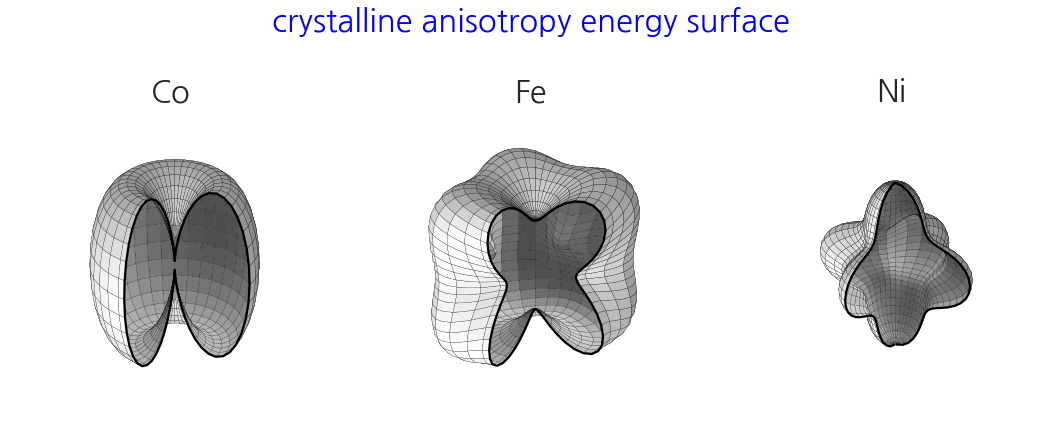

In [192]:
fig, axs = plt.subplots(ncols=3, 
                        figsize=(15, 6), 
                       constrained_layout=True,
                        subplot_kw={"projection":"3d"})
for ax, mat in zip(axs, ["Co", "Fe", "Ni"]):
    ax.plot_surface(df[f"x_{mat}"].values.reshape((37, 73))[:,:-19], 
                    df[f"y_{mat}"].values.reshape((37, 73))[:,:-19], 
                    df[f"z_{mat}"].values.reshape((37, 73))[:,:-19], 
                    ec="k", lw=0.2,
                    color="w", lightsource=LightSource(0, 10),
                    alpha=1)
    ax.plot(df[f"x_{mat}"].values.reshape((37, 73))[:,-20], 
            df[f"y_{mat}"].values.reshape((37, 73))[:,-20], 
            df[f"z_{mat}"].values.reshape((37, 73))[:,-20], 
            c="k", alpha=1)
    ax.plot(df[f"x_{mat}"].values.reshape((37, 73))[:,0], 
            df[f"y_{mat}"].values.reshape((37, 73))[:,0], 
            df[f"z_{mat}"].values.reshape((37, 73))[:,0], 
            c="k", alpha=1)
    ax.set_box_aspect((1, 1, 1))
    ax.axis(False)
    ax.set_title(mat, fontsize="xx-large")
    
fig.suptitle("crystalline anisotropy energy surface\n", 
             color="blue", fontsize="xx-large")

fig.savefig("84_sphere_13.png")